# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/dsvitorchaves/EBAC/main/previsao_de_renda.csv'

dados = pd.read_csv(url)
dados.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [31]:
# Verifica se 'Unnamed: 0' está presente e remove a coluna
if 'Unnamed: 0' in dados.columns:
    dados = dados.drop('Unnamed: 0', axis=1)

dados.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [32]:
dados.columns

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'mau', 'renda'],
      dtype='object')

In [33]:
dados.dtypes

data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [34]:
# Seleciona colunas com tipos numéricos (int e float)
variaveis_quantitativas = dados.select_dtypes(include=['int64', 'float64'])

variaveis_quantitativas.head()

,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,8682,1,36,3.575342,3.0,3369.24
1,12830,0,42,0.860274,2.0,6096.14
2,2885,2,31,8.065753,4.0,5658.98
3,16168,0,50,1.208219,2.0,7246.69
4,12438,0,52,13.873973,2.0,4017.37


C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

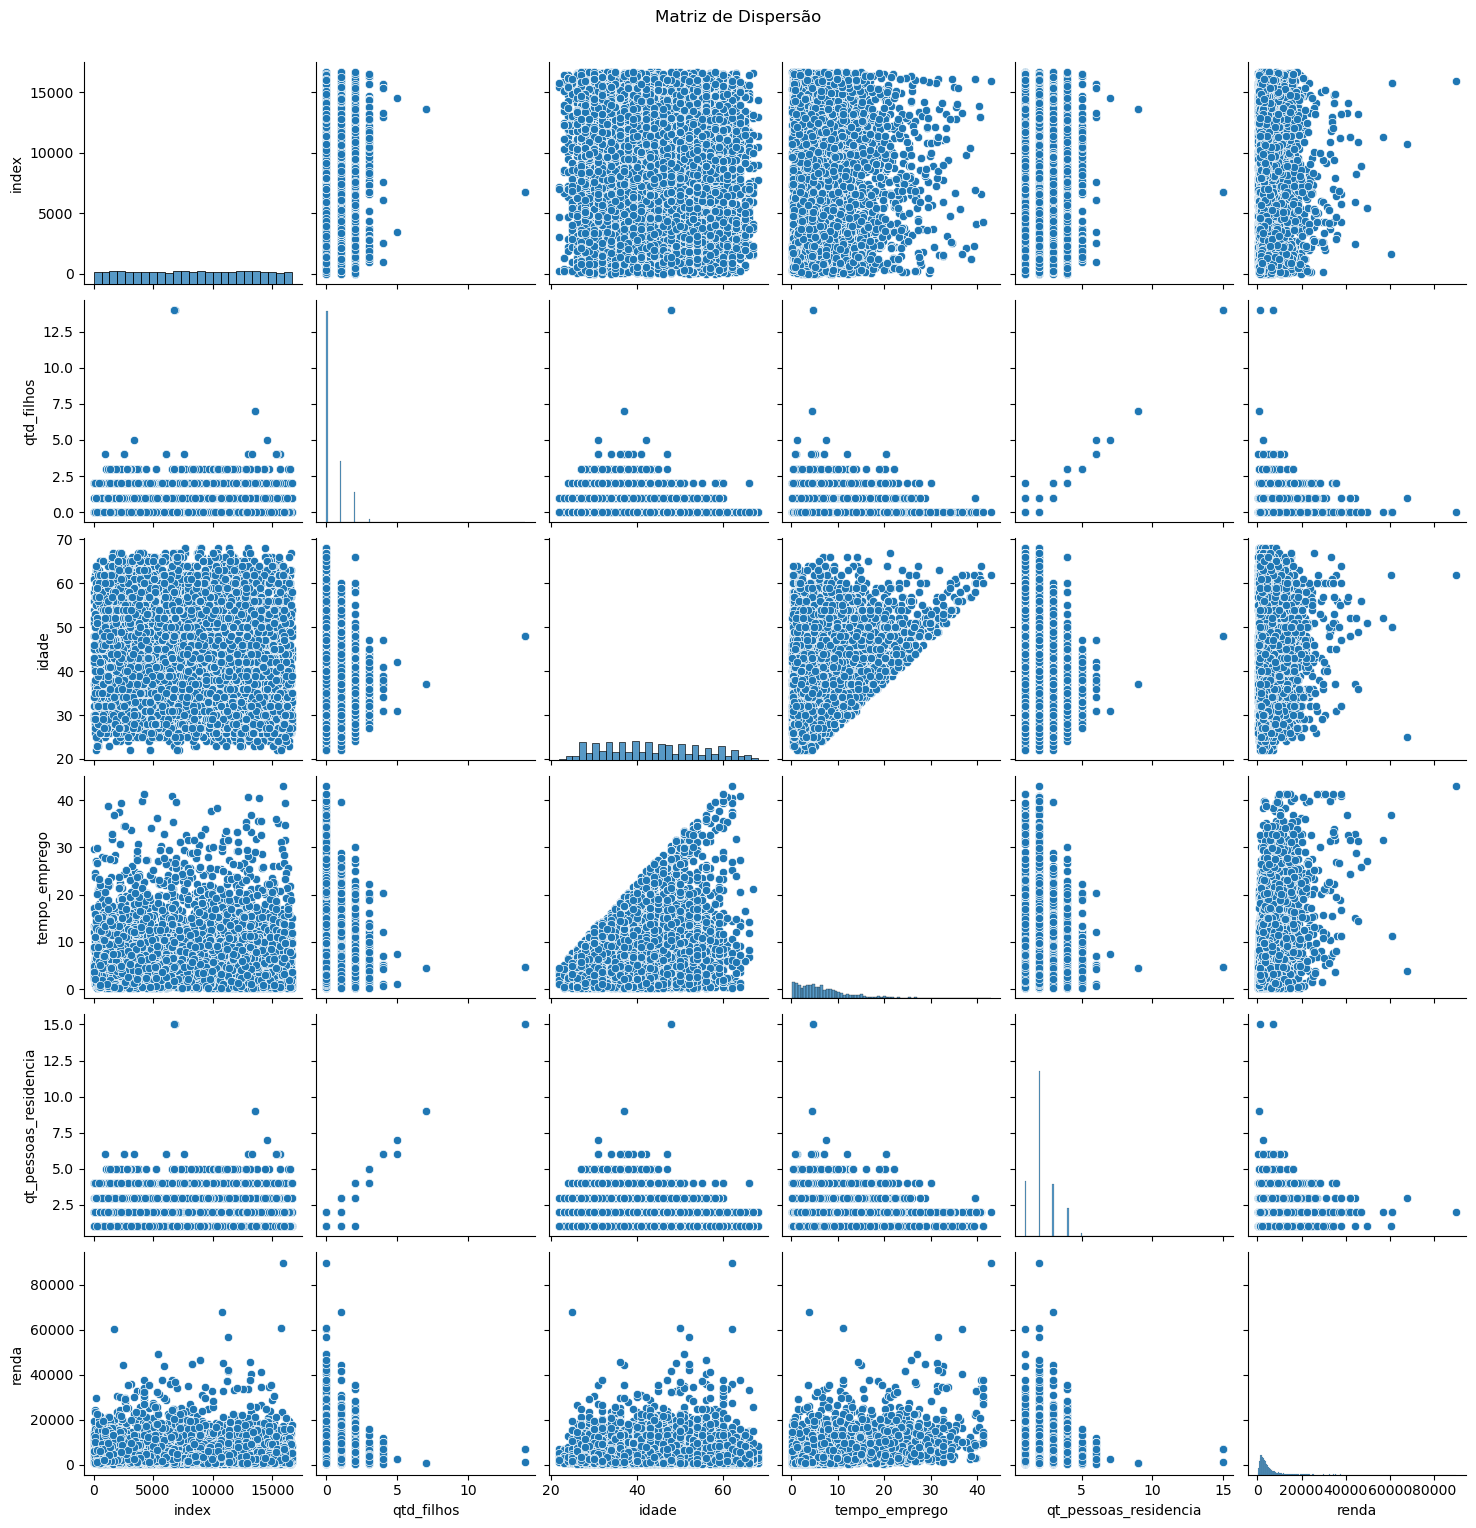

In [35]:
# 1 # Criar a matriz de dispersão
sns.pairplot(variaveis_quantitativas)
plt.suptitle('Matriz de Dispersão', y=1.02)
plt.show()

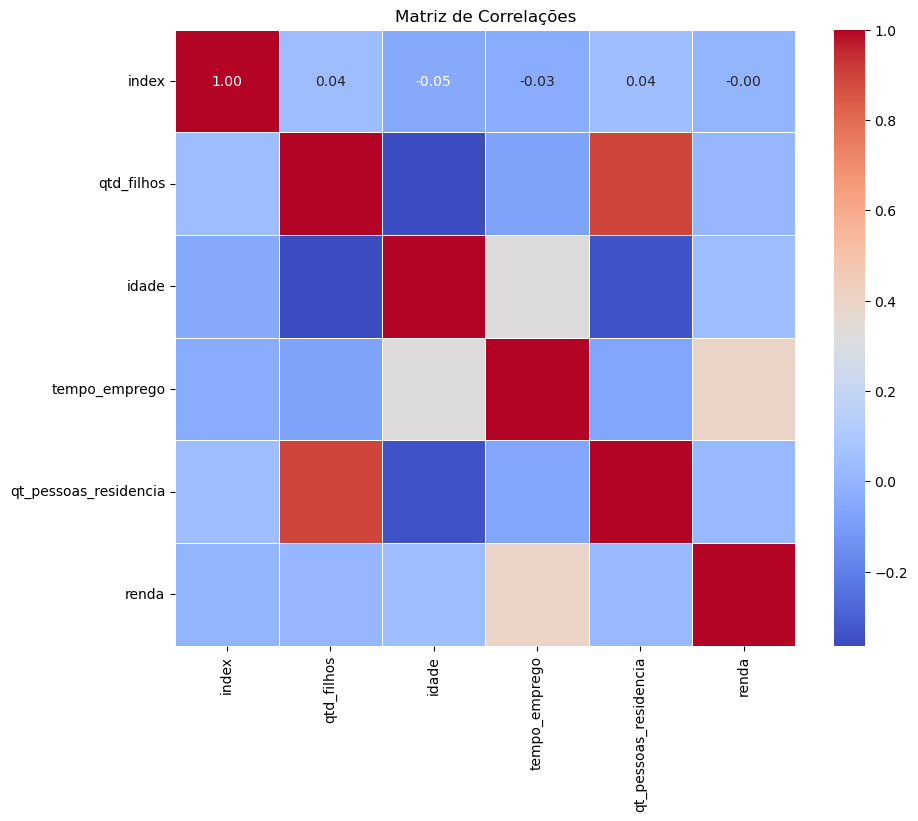

In [36]:
# Calcular a matriz de correlações
correlacoes = variaveis_quantitativas.corr()

# Criar o mapa de calor da matriz de correlações
plt.figure(figsize=(10, 8))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlações')
plt.show()

### Analisando as correlações entre as variáveis do nosso conjunto de dados, observamos que:

- Correlação entre Idade e Tempo de Emprego: Existe uma correlação relativamente alta entre a idade e o tempo de emprego dos indivíduos. Isso sugere que, em média, indivíduos mais velhos tendem a ter mais tempo de emprego, o que pode refletir uma trajetória de carreira mais longa e estável ao longo dos anos.

- Correlação entre Renda e Tempo de Emprego: Também identificamos uma correlação relativamente alta entre a renda e o tempo de emprego. Esse padrão indica que indivíduos com mais tempo de emprego tendem a ter rendas maiores. Esse comportamento pode ser atribuído ao avanço na carreira e ao crescimento salarial associado ao aumento da experiência e ao tempo dedicado ao trabalho.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

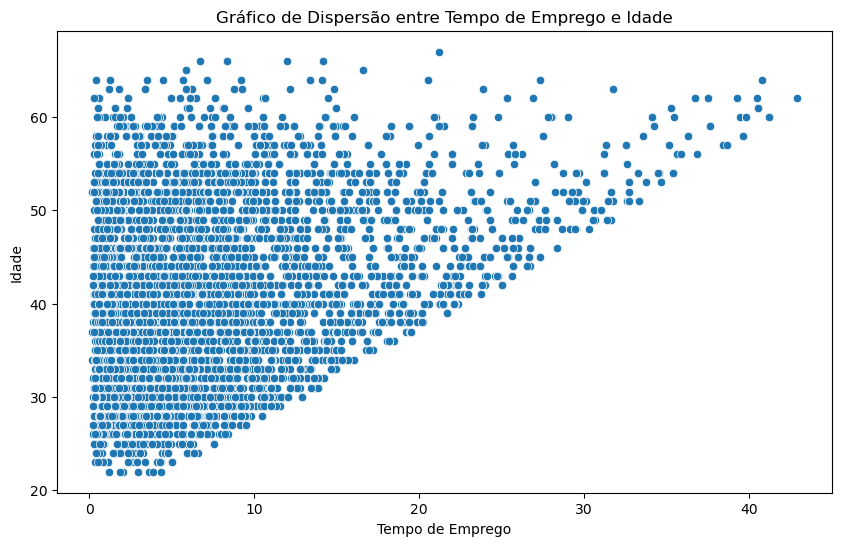

In [37]:
# Criar o gráfico de dispersão para 'tempo_emprego' e 'idade'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='tempo_emprego', y='idade')

# Adicionar título e rótulos aos eixos
plt.title('Gráfico de Dispersão entre Tempo de Emprego e Idade')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Idade')

# Exibir o gráfico
plt.show()

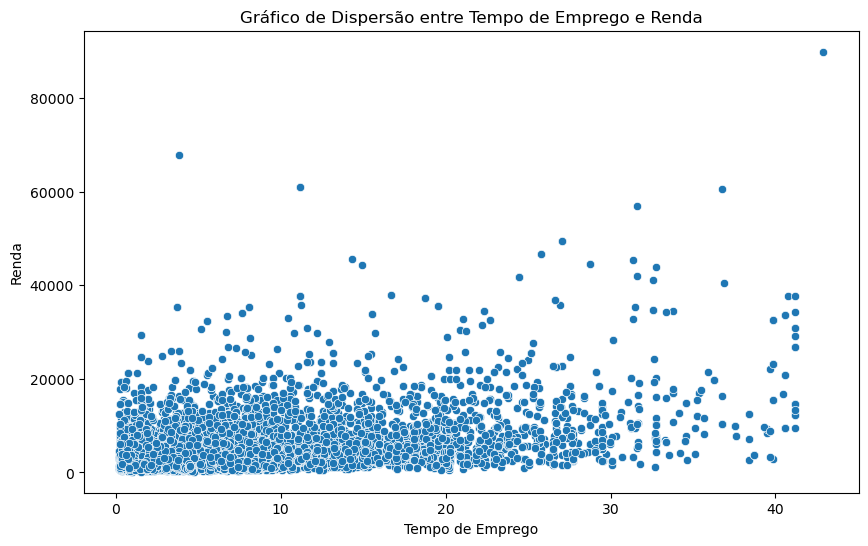

In [38]:
# Criar o gráfico de dispersão para 'tempo_emprego' e 'renda'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='tempo_emprego', y='renda')

# Adicionar título e rótulos aos eixos
plt.title('Gráfico de Dispersão entre Tempo de Emprego e Renda')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Renda')

# Exibir o gráfico
plt.show()

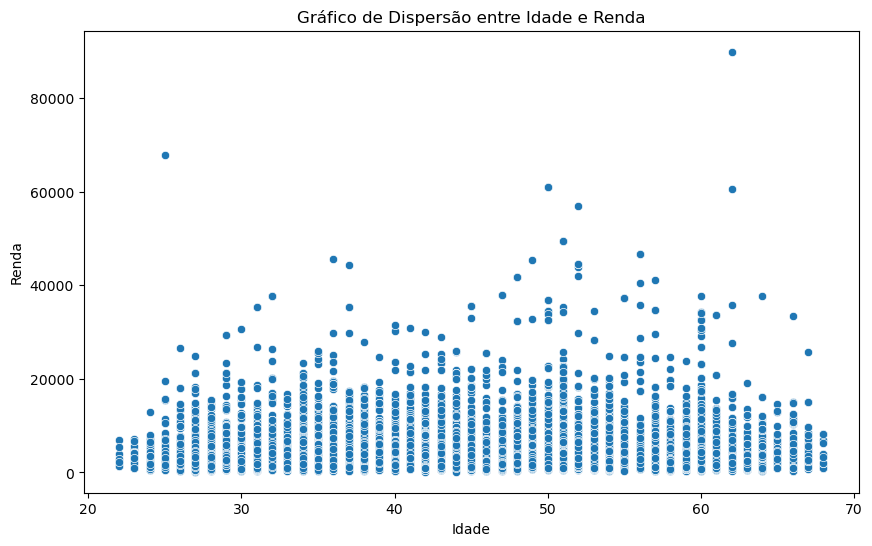

In [39]:
# Criar o gráfico de dispersão para 'idade' e 'renda'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='idade', y='renda')

# Adicionar título e rótulos aos eixos
plt.title('Gráfico de Dispersão entre Idade e Renda')
plt.xlabel('Idade')
plt.ylabel('Renda')

# Exibir o gráfico
plt.show()

3) Na sua opinião, há outliers na variável renda?

- Durante a análise dos gráficos de dispersão e da matriz de dispersão, foi possível identificar a presença de outliers significativos na variável renda. Notamos que alguns pontos de dados estão extremamente dispersos e situados na extremidade oposta do gráfico, em comparação com a maioria das observações.

- Esses outliers indicam que há valores de renda que estão muito acima da faixa usual observada para a maioria dos indivíduos no conjunto de dados. Essa dispersão acentuada pode refletir situações atípicas ou excepcionais, como altos rendimentos que não seguem o padrão geral da amostra.

- A presença de outliers deve ser considerada ao interpretar os dados e pode influenciar a análise estatística e a modelagem preditiva. É importante investigar essas observações para entender se são erros de entrada, casos excepcionais válidos, ou se representam um aspecto relevante da variabilidade da renda.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [40]:
# Verificar se a variável contém valores zero ou negativos
dados['renda'].describe()

count    15000.000000
mean      4624.632946
std       4628.571729
min        159.900000
25%       1945.740000
50%       3278.260000
75%       5642.365000
max      89918.040000
Name: renda, dtype: float64

In [41]:
# Calcular o logaritmo da variável 'renda'
dados['renda_log'] = np.log(dados['renda'])

# Exibir as primeiras linhas do DataFrame com a nova coluna
dados[['renda', 'renda_log']].head()

,renda,renda_log
0,3369.24,8.122442
1,6096.14,8.715411
2,5658.98,8.640999
3,7246.69,8.888300
4,4017.37,8.298383


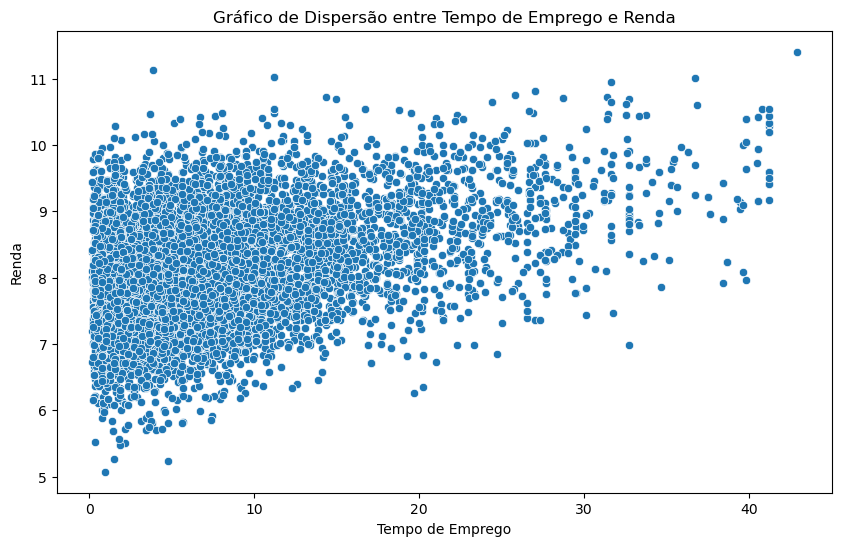

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='tempo_emprego', y='renda_log')

# Adicionar título e rótulos aos eixos
plt.title('Gráfico de Dispersão entre Tempo de Emprego e Renda')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Renda')

# Exibir o gráfico
plt.show()

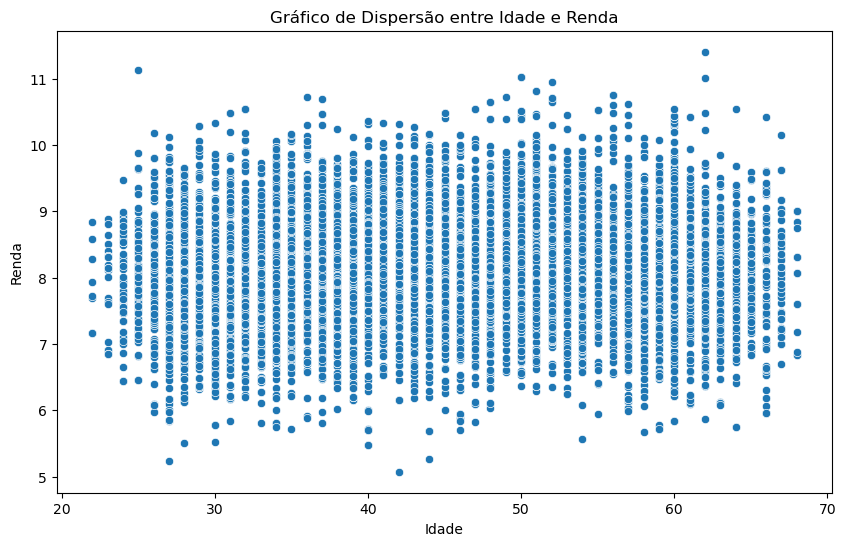

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dados, x='idade', y='renda_log')

# Adicionar título e rótulos aos eixos
plt.title('Gráfico de Dispersão entre Idade e Renda')
plt.xlabel('Idade')
plt.ylabel('Renda')

# Exibir o gráfico
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

- Após aplicar a transformação logarítmica na variável renda, observamos uma melhoria significativa na visualização dos dados. A transformação logarítmica ajudou a reduzir o impacto dos outliers, resultando em uma distribuição mais uniforme dos dados nos gráficos.

- Anteriormente, os gráficos mostravam uma dispersão significativa de alguns valores de renda, situados na extremidade superior do gráfico, o que dificultava a interpretação e análise das tendências gerais. Com a transformação logarítmica, esses outliers foram suavizados, permitindo uma visualização mais clara e coerente da distribuição da renda.

- Essa abordagem facilita a identificação de padrões e relações nas variáveis, ao mesmo tempo em que melhora a qualidade da análise estatística e a modelagem preditiva, minimizando o efeito de valores extremos que poderiam distorcer os resultados.